# Praxisbeispiel - Bildklassifikation mit CNNs

## Ziel:
Einführung in Convolutional Neural Networks mit TensorFlow/Keras anhand eines Bildklassifikationsproblems.


## 1. Bibliotheken laden

In [2]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

## 2. Daten laden

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step 


## 3. Daten einsehen

In [4]:
x_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

## 4. Daten vorbereiten (Data Preprocessing)

### Normalisierung

Normalisieren von Bilderdaten ist wiederum anders als von numerischen Daten. 

Der Grund für die Normalisierung der Bilder(daten) ist die Vermeidung der Möglichkeit von explodierenden Gradienten aufgrund des großen Pixelbereichs [0, 255] und die Verbesserung der Konvergenzgeschwindigkeit. 
Daher kann entweder  
1. man jedes Bild normalisieren, so dass der Pixelbereich sich in [-1, 1] befindet 
oder
2. man teilt jeden Wert durch den maximalen Pixelwert, d.h. 255, so dass der Bereich der Pixel im Bereich [0, 1] liegt.

Ein weiterer Grund für die Normalisierung von Bilddaten ist wenn man Transfer Learning verwendet. 
Wenn z. B. ein bereits trainiertes Modell verwendet wird, das mit Bildern trainiert wurde, deren Pixel im Bereich [0, 1] liegen, sollte man sicherstellen, dass die neuen Werte, die man dem Modell liefert, im gleichen Bereich liegen. Andernfalls werden die Ergebnisse verfälscht werden.

In [ ]:
# Normalisierung
x_train, x_test = x_train / 255.0, x_test / 255.0  

### Dimension erweitern

Zuden existierenden Dimensionen der Bilddaten fügen wir eine neue Dimension hinzu. 
Diese neue Dimension stellt die Anzahl der in den Daten vorhandenen Kanäle dar.

Bei Farbbildern wären dies 3 Kanäle, die den roten, grünen und blauen Kanal darstellen. 
In diesem Fall handelt es sich um Schwarz-Weiß-Bilder, so dass nur 1 Kanal vorhanden ist.

In [ ]:
# Dimension erweitern
x_train = x_train[..., tf.newaxis]  
x_test = x_test[..., tf.newaxis]

## 5. Modell definieren

CNN Layers:
- Conv2D:


  Die am häufigsten verwendete Art der Faltung ist die 2D-Faltungsschicht und wird üblicherweise als conv2D abgekürzt. Ein Filter oder ein Kernel in einer conv2D-Schicht „gleitet“ über die 2D-Eingangsdaten und führt eine elementweise Multiplikation durch. Das Ergebnis ist die Summierung der Ergebnisse zu einem einzigen Ausgabepixel.

  Parameter bei der Erstellung einer Conv2D Schicht:

  1. 32: Anzahl von Filtern in dieser Convolution-Schicht. Hierfür wird immer empfohlen, Potenzen von 2 als Werte zu verwenden.
  2. (3, 3): bestimmt die Dimensionen des Kernels. Übliche Abmessungen sind 1×1, 3×3, 5×5 oder 7×7, entsprechend als (1, 1), (3, 3), (5, 5) oder (7, 7)-Tupel übergeben.
     Es muss hier eine ganze Zahl oder ein Tupel/Liste von 2 ganzen Zahlen, die die Höhe und Breite des 2D-Faltungsfensters angeben. Zudem muss dieser Parameter eine ungerade ganze Zahl sein.
  4. activation="..": gibt den Namen der Aktivierungsfunktion an, die nach der Faltung/convolution verwendet werden soll. (siehe unten)
    
  
- MaxPooling2D (more details: https://www.geeksforgeeks.org/cnn-introduction-to-pooling-layer/?ref=header_outind) 

  Die Pooling-Schicht wird in CNNs verwendet, um die räumlichen Dimensionen (Breite und Höhe) der eingegebenen Merkmalskarten zu reduzieren und gleichzeitig die wichtigsten Informationen beizubehalten. Dabei wird ein zweidimensionaler Filter über jeden Kanal einer Merkmalskarte gezogen und die Merkmale innerhalb des vom Filter abgedeckten Bereichs zusammengefasst.

  Zudem hilft es die Dimensionalität zu verringern, da Pooling-Schichten die räumliche Größe der Feature-Matrix reduzieren, somit die Anzahl der Parameter und Berechnungen im Network verringert wird. So wird das Modell schneller und effizienter. Außerdem trägt die Reduzierung der räumlichen Dimensionen dazu bei, Overfitting zu verhindern. 

- Flatten:


  Eine flache Schicht des neuronalen Netzes wird verwendet, um die mehrdimensionale Ausgabe der vorhergehenden Schicht in ein eindimensionales Feld umzuwandeln, bevor sie zur weiteren Verarbeitung in eine vollständig verbundene Schicht (dense layers) eingespeist wird.

  Zudem reduziert es die Dimension in den Daten und vereinfacht die Modellarchitektur.

  
- Dense:
  Die Dense Schicht ist eine vollständig verbundene Schicht.

### (typische) Aktivierungsfunktionen 
- relu:
  
  Die ReLU-Aktivierungsfunktion wird verwendet, um Nichtlinearität in ein neuronales Netz einzuführen. Sie trägt dazu bei, das Problem des verschwindenden Gradienten beim Training von Modellen des maschinellen Lernens zu entschärfen, und ermöglicht es neuronalen Netzen, komplexere Beziehungen in Daten zu lernen.
  Wenn eine Modelleingabe positiv ist, gibt die ReLU-Funktion denselben Wert aus. Wenn eine Modelleingabe negativ ist, gibt die ReLU-Funktion den Wert Null aus.

- softmax:

  Die Softmax-Funktion, die häufig in der letzten Schicht eines neuronalen Netzmodells für Klassifizierungsaufgaben verwendet wird, wandelt rohe Ausgabeergebnisse - auch als Logits bekannt - in Wahrscheinlichkeiten um, indem sie den Exponentialwert jeder Ausgabe nimmt und diese Werte normalisiert, indem sie durch die Summe aller Exponentialwerte dividiert wird.

  https://botpenguin.com/glossary/softmax-function

In [7]:
# Modell definieren
model = models.Sequential(
   [
       layers.Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1)),
       layers.MaxPooling2D((2, 2)),
       layers.Conv2D(64, (3, 3), activation="relu"),
       layers.MaxPooling2D((2, 2)),
       layers.Conv2D(64, (3, 3), activation="relu"),
       layers.Flatten(),
       layers.Dense(64, activation="relu"),
       layers.Dense(10, activation="softmax"),
   ]
)

/Users/minye/Documents/gitHub/ainvone/cusy-gfu/gfu/schulung-ki_von_grund_auf/01-Einfuehrung-in-KI/.venv312/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Gute Visualisierungen solch ähnlicher Struktur können hier gefunden werden:

https://miro.medium.com/v2/resize:fit:1400/format:webp/1*vkQ0hXDaQv57sALXAJquxA.jpeg

https://miro.medium.com/v2/resize:fit:1400/format:webp/1*uAeANQIOQPqWZnnuH-VEyw.jpeg

(Credits an Sumit Saha: https://medium.com/towards-data-science/a-comprehensive-guide-to-convolutional-neural-networks-the-eli5-way-3bd2b1164a53)

## 6. Modell kompilieren

In [8]:
# Modell kompilieren
model.compile(
   optimizer="adam",
   loss="sparse_categorical_crossentropy",
   metrics=["accuracy"],
)

## 7. Training

In [9]:
model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.5201 - loss: 1.3256 - val_accuracy: 0.9181 - val_loss: 0.2701
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9247 - loss: 0.2469 - val_accuracy: 0.9536 - val_loss: 0.1489
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9534 - loss: 0.1544 - val_accuracy: 0.9650 - val_loss: 0.1072
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9662 - loss: 0.1099 - val_accuracy: 0.9733 - val_loss: 0.0798
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9714 - loss: 0.0891 - val_accuracy: 0.9786 - val_loss: 0.0680


In [11]:
model.get_weights()

[array([[[[-1.22406550e-01, -1.04940124e-01,  1.05540431e+00,
            7.33939633e-02, -1.00426063e-01, -5.34634618e-03,
            7.14282170e-02, -1.25062847e+00,  6.30540550e-02,
           -2.37185694e-02, -7.45562315e-02, -1.64713878e-02,
           -1.12705171e+00, -1.32961959e-01, -5.87262250e-02,
            1.01219498e-01,  6.92881346e-01,  1.01272047e+00,
            1.19992472e-01,  1.23000138e-01, -3.42749394e-02,
           -9.46973711e-02,  4.86068949e-02,  1.68845132e-02,
           -1.17901556e-01, -4.75684665e-02, -1.04668069e+00,
           -9.32694674e-02, -9.69426095e-01,  9.41504955e-01,
            1.00876343e+00,  1.07508950e-01]],
 
         [[ 6.25128299e-02,  1.03033878e-01,  1.63415444e+00,
           -5.86562604e-02,  6.17862120e-03,  6.60237372e-02,
           -8.15676749e-02, -1.47776830e+00, -1.31476879e-01,
           -1.34139717e-01,  1.89567413e-02,  1.34701788e-01,
           -1.18035138e+00, -3.27071249e-02,  5.31418025e-02,
           -9.4808209

## 8. Modell evaluieren

In [13]:
# Evaluation
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Testgenauigkeit: {test_acc}")
print(f"Test Loss: {test_loss}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9749 - loss: 0.0818 
Testgenauigkeit: 0.978600025177002
Test Loss: 0.06802631169557571


## 9. Beispielhafte Vorhersage


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step  


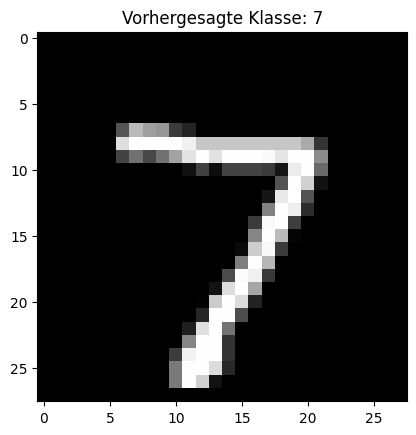

In [14]:
predictions = model.predict(x_test)
plt.imshow(x_test[0].reshape(28, 28), cmap="gray")
plt.title(f"Vorhergesagte Klasse: {predictions[0].argmax()}")
plt.show()